In [1]:
import numpy as np
from scipy.optimize import curve_fit
popt, pcov = [0],[0]

In [2]:
def funcPoly(x,a,b,c,d,e):
    return a+b*x+c*x**2+d*x**3+e*x**4

In [10]:
def func(x, a, b):
    return a*np.exp(b * x)

def fittingCurve(xD,yD):
    popt, pcov = curve_fit(funcPoly, xD, yD)
    print(popt)
    return popt

def f(x,popt):
    return funcPoly(x,*popt)

In [11]:
def findx(y0,popt):
    x0,dx=0,10
    approx=y0-f(x0,popt)
    flag=True
    while dx>1e-5:
        if approx<0:#What decides to calculate up or down
            x0=x0+dx
        else:
            x0=x0-dx
            dx=dx/10
            x0=x0+dx
        
        approx=y0-f(x0,popt)
    return x0

In [12]:
def decibelFrequency(x,y):
    popt=fittingCurve(x,y)
    y0=max(y)/np.sqrt(2)
    x=findx(y0,popt)
    return x

In [13]:
xD,yD=[100,200,500,1000,2000,5000,10000,12000,15000],[2.4,2.4,2.4,2.4,2.4,2.4,1.8,1.7,1.6]
print("The 3dB frequency is estimated to be = ",decibelFrequency(xD,yD))

[ 2.38454809e+00  3.43515553e-05 -3.70429643e-09 -1.22359507e-12
  7.25222604e-17]
The 3dB frequency is estimated to be =  11501.316509999999


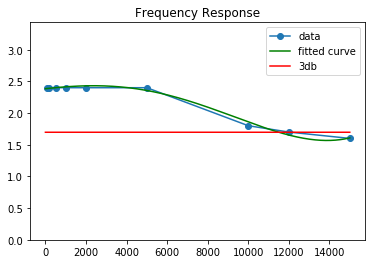

In [21]:
import matplotlib.pyplot as plt

x=np.linspace(1,max(xD),100000)
plt.plot(xD,yD,'o-',label='data')
plt.plot(x,y,'g',label='fitted curve')
plt.plot(x,[max(yD)/np.sqrt(2)]*len(x),'r',label='3db')
plt.ylim(0,max(y)+1)
plt.legend()
plt.title('Frequency Response')
plt.savefig('frequencyResponseGraph.png')
plt.show()


In [16]:
popt=[ 2.38454809e+00 , 3.43515553e-05, -3.70429643e-09 ,-1.22359507e-12,7.25222604e-17]
y=f(x,popt)